In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import sqlite3

In [11]:
db_conn = sqlite3.connect("league.db")
sql3 = ("SELECT ch.championName, ch.difficulty, COUNT(m.winner) as games_won_by_champ FROM Champions as ch JOIN Participants as p on ch.championId = p.championId JOIN Matches as m on p.matchId = m.matchId WHERE m.winner = p.teamId GROUP BY ch.championName ORDER BY championName ASC")
df1 = pd.read_sql(sql3, con = db_conn)

sql4 = "select Champions.championName, Participants.teamPosition as role, count(*) as total from Participants join Champions on Participants.championId == Champions.championId join Matches on Matches.matchId == Participants.matchId group by championName Order BY championName"
df2 = pd.read_sql(sql4, con = db_conn)
# print(df2)
dataframe = pd.DataFrame().assign(championName=df1['championName'], gamesWon=df1['games_won_by_champ'], role=df2['role'],difficulty=df1["difficulty"], total=df2['total'])
dataframe['percentage'] = np.nan
dataframe['percentage'] = dataframe['gamesWon']/dataframe['total'] * 100
dataframe['percentage'] = dataframe['percentage'].apply(lambda x: round(x, 2))
dataframe = dataframe.drop(['gamesWon','total','difficulty'], axis = 1)
dataframe

,championName,role,percentage
0,Aatrox,TOP,49.11
1,Ahri,MIDDLE,49.16
2,Akali,TOP,48.43
3,Akshan,MIDDLE,49.30
4,Alistar,UTILITY,49.44
...,...,...,...
156,Zeri,BOTTOM,43.92
157,Ziggs,MIDDLE,51.09
158,Zilean,MIDDLE,51.05
159,Zoe,MIDDLE,47.28


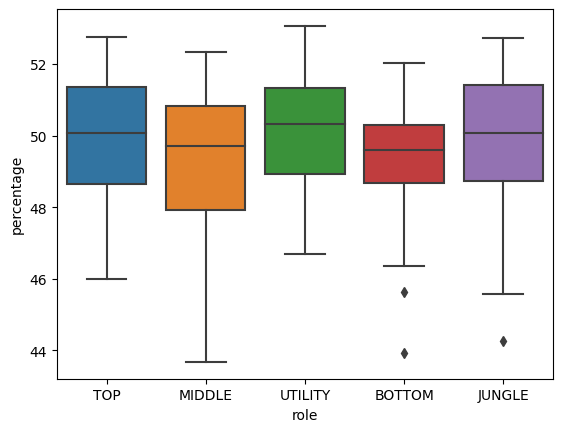

In [18]:
df3 = dataframe.melt(id_vars=['role','percentage'], var_name ='dataset')
df3 = df3.drop(['dataset'], axis = 1)
ax = sns.boxplot(x='role', y='percentage', data=df3)



In [4]:
predict = []
for i, row in df2.iterrows():
    predict.append(row['percentage'])
# print(predict)

[49.11, 49.16, 48.43, 49.3, 49.44, 52.7, 50.36, 46.21, 45.64, 50.13, 46.67, 43.68, 48.54, 51.48, 50.59, 51.88, 48.59, 49.51, 49.21, 50.55, 48.8, 47.49, 50.04, 52.1, 51.93, 49.25, 51.21, 48.97, 48.56, 48.02, 49.94, 49.87, 51.02, 50.45, 48.08, 51.7, 46.75, 45.57, 49.67, 47.68, 49.48, 53.06, 52.28, 50.63, 46.61, 50.32, 49.38, 50.45, 47.92, 50.8, 49.39, 49.98, 46.37, 48.0, 49.08, 48.53, 48.69, 49.73, 49.58, 47.9, 49.68, 48.82, 50.72, 49.67, 47.12, 45.65, 50.51, 51.03, 47.66, 48.66, 48.06, 51.14, 49.74, 50.88, 51.56, 51.39, 52.03, 50.84, 52.74, 51.08, 51.56, 51.83, 49.06, 51.3, 44.27, 51.65, 51.41, 49.0, 51.29, 47.6, 51.37, 50.18, 48.37, 48.95, 47.22, 50.1, 48.92, 52.21, 47.95, 50.96, 50.73, 49.28, 47.96, 48.11, 48.83, 46.0, 51.22, 50.47, 48.96, 51.03, 51.67, 49.86, 51.03, 52.72, 52.41, 50.94, 49.96, 50.21, 51.67, 50.16, 52.76, 48.64, 50.38, 48.6, 48.32, 47.71, 50.89, 50.73, 48.23, 51.48, 51.28, 49.58, 45.5, 50.04, 52.21, 52.33, 49.74, 48.67, 50.45, 51.92, 50.98, 50.85, 48.81, 51.42, 49.91,

In [5]:
sql6 = "select c.championName, c.difficulty, m.matchId, winner from Champions c JOIN Participants p on p.championId = c.championId JOIN Matches m on m.matchId = p.matchId ORDER BY m.matchId DESC LIMIT 10000"
df4 = pd.read_sql(sql6, con = db_conn)
df4

,championName,difficulty,matchId,winner
0,Mordekaiser,4,NA1_4490981768,100
1,Evelynn,10,NA1_4490981768,100
2,Veigar,7,NA1_4490981768,100
3,Varus,2,NA1_4490981768,100
4,Soraka,3,NA1_4490981768,100
...,...,...,...,...
9995,Malzahar,6,NA1_4490439250,200
9996,Ashe,4,NA1_4490439250,200
9997,Maokai,3,NA1_4490439250,200
9998,Darius,2,NA1_4490439250,200


In [15]:
# pd.melt(df4, id_vars =['matchId'], value_vars =['winner', 'championName'])
# df4
# result = []
# for i, row in df4.iterrows(): 
#     result.append({"champion_name": row['championName'], "difficulty" : row['difficulty']})
# print(result)
# team: totaldifficult, avg_win_rate, label 
# df5= pd.merge(df4, df2, left_index=True, right_index=True)
# print(df5)

from sklearn.metrics import mean_squared_error
import random
true = random.choices(predict, k =161)
print(mean_squared_error(predict, true))


7.179945341614906
